# Exploratory Notebook

Use this notebook to explore the project data using `pandas`, SQL, and Matplotlib!

You will not be submitting this notebook so feel free to try out different "experiments" to figure out what works best.

When you're happy with your code and want to turn it in, copy it into the `final.ipynb` notebook and download that notebook for the PDF submission.

## CSV and TSV Data

Here is some starter code that opens up some of the CSV and TSV data and loads it into DataFrames:

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
bom_movie_gross = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
rt_movie_info = pd.read_csv("zippedData/rt.movie_info.tsv.gz", delimiter="\t")
rt_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [4]:
rt_movie_info['writer'].value_counts()

Woody Allen                                         4
John Hughes                                         3
Hong Sang-soo                                       3
Jim Jarmusch                                        3
Sylvester Stallone                                  3
                                                   ..
Reginald Denham|Garrett Elsden Fort|Edward Percy    1
Chuck Barris                                        1
Gene Roddenberry|Alex Kurtzman|Roberto Orci         1
Don Coscarelli                                      1
Lawrence Konner|Mark Rosenthal                      1
Name: writer, Length: 1069, dtype: int64

In [5]:
rt_movie_info['director'].value_counts()

Steven Spielberg    10
Clint Eastwood       8
Bruce Beresford      4
Woody Allen          4
Curtis Hanson        4
                    ..
Andrew Dominik       1
Mauritz Stiller      1
Danny Cannon         1
Alexander Payne      1
Denys Arcand         1
Name: director, Length: 1125, dtype: int64

In [6]:
tmdb_movies = pd.read_csv("zippedData/tmdb.movies.csv.gz")
tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [7]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


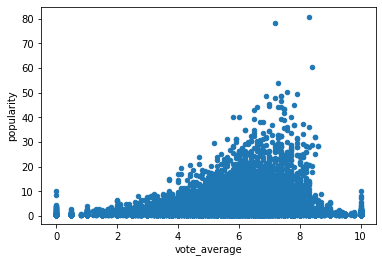

In [8]:
tmdb_movies.plot('vote_average', 'popularity',  kind='scatter');

In [9]:
# Take genre data and compare it with the popularity/vote_average to see which genre is most popular or highly rated.

In [10]:
rt_reviews = pd.read_csv("zippedData/rt.reviews.tsv.gz", encoding='latin1', delimiter = "\t")
rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [11]:
tn_movie_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [12]:
tn_movie_budgets_rename = tn_movie_budgets.rename(columns={'movie':'primary_title'})
tn_movie_budgets_rename

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [13]:
tn_movie_budgets_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   primary_title      5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [14]:
def money_to_int(pandas_series):
    pandas_series = pandas_series.str.strip('$').str.replace(',', '').astype('int64')
    return pandas_series

In [15]:
money_to_int(tn_movie_budgets_rename['production_budget'])
money_to_int(tn_movie_budgets_rename['domestic_gross'])
money_to_int(tn_movie_budgets_rename['worldwide_gross'])

0       2776345279
1       1045663875
2        149762350
3       1403013963
4       1316721747
           ...    
5777             0
5778        240495
5779          1338
5780             0
5781        181041
Name: worldwide_gross, Length: 5782, dtype: int64

In [16]:
tn_movie_budgets_rename['production_budget'] = money_to_int(tn_movie_budgets_rename['production_budget'])

In [17]:
tn_movie_budgets_rename['domestic_gross'] = money_to_int(tn_movie_budgets_rename['domestic_gross'])
tn_movie_budgets_rename['worldwide_gross'] = money_to_int(tn_movie_budgets_rename['worldwide_gross'])

In [18]:
tn_movie_budgets_rename

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


This does not include all of the CSVs! Make sure you open and explore some of the other ones.

## SQL Data

The below line should only need to be run once. It unzips the SQL data, since SQLite doesn't work with zipped data.

In [19]:
! unzip -n zippedData/im.db.zip

Archive:  zippedData/im.db.zip


Then here is some starter code that reads one of the data tables from the database:

In [20]:
import sqlite3

In [21]:
conn = sqlite3.connect("im.db")

In [80]:
master = pd.read_sql("""
    SELECT * 
    FROM sqlite_master;
""", conn)
master

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [94]:
[print(master['sql'].iloc[i]) for i in range(0, 8)]

CREATE TABLE "movie_basics" (
"movie_id" TEXT,
  "primary_title" TEXT,
  "original_title" TEXT,
  "start_year" INTEGER,
  "runtime_minutes" REAL,
  "genres" TEXT
)
CREATE TABLE "directors" (
"movie_id" TEXT,
  "person_id" TEXT
)
CREATE TABLE "known_for" (
"person_id" TEXT,
  "movie_id" TEXT
)
CREATE TABLE "movie_akas" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "title" TEXT,
  "region" TEXT,
  "language" TEXT,
  "types" TEXT,
  "attributes" TEXT,
  "is_original_title" REAL
)
CREATE TABLE "movie_ratings" (
"movie_id" TEXT,
  "averagerating" REAL,
  "numvotes" INTEGER
)
CREATE TABLE "persons" (
"person_id" TEXT,
  "primary_name" TEXT,
  "birth_year" REAL,
  "death_year" REAL,
  "primary_profession" TEXT
)
CREATE TABLE "principals" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "person_id" TEXT,
  "category" TEXT,
  "job" TEXT,
  "characters" TEXT
)
CREATE TABLE "writers" (
"movie_id" TEXT,
  "person_id" TEXT
)


[None, None, None, None, None, None, None, None]

In [22]:
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


Geting movie info from imdb database that has averagerating, numvotes, movie titles, start_year and genre. 

This will be used to combine data from `tmdb_movies`

In [96]:
pd.read_sql("""
    SELECT *
    FROM movie_akas
""", conn)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [23]:
imdb = pd.read_sql("""
    SELECT primary_title, original_title, start_year, genres, averagerating, numvotes
    FROM movie_basics AS b
    JOIN movie_ratings AS r
    ON b.movie_id = r.movie_id
    ORDER BY numvotes DESC;
    """, conn)
imdb

,primary_title,original_title,start_year,genres,averagerating,numvotes
0,Inception,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066
1,The Dark Knight Rises,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769
2,Interstellar,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334
3,Django Unchained,Django Unchained,2012,"Drama,Western",8.4,1211405
4,The Avengers,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655
...,...,...,...,...,...,...
73851,Columbus,Columbus,2018,Comedy,5.8,5
73852,BADMEN with a good behavior,BADMEN with a good behavior,2018,"Comedy,Horror",9.2,5
73853,July Kaatril,July Kaatril,2019,Romance,9.0,5
73854,Swarm Season,Swarm Season,2019,Documentary,6.2,5


In [24]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   primary_title   73856 non-null  object 
 1   original_title  73856 non-null  object 
 2   start_year      73856 non-null  int64  
 3   genres          73052 non-null  object 
 4   averagerating   73856 non-null  float64
 5   numvotes        73856 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 3.4+ MB


In [25]:
imdb['genres'].value_counts()

Drama                           11612
Documentary                     10313
Comedy                           5613
Horror                           2692
Comedy,Drama                     2617
                                ...  
Adventure,Mystery,Romance           1
Adventure,Musical                   1
Adventure,Biography,Family          1
Adventure,Documentary,Horror        1
Comedy,History,Mystery              1
Name: genres, Length: 923, dtype: int64

<AxesSubplot:xlabel='numvotes', ylabel='averagerating'>

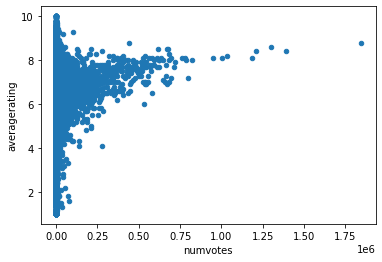

In [26]:
imdb.plot('numvotes', 'averagerating',  kind='scatter')

In [27]:
imdb_person = pd.read_sql("""
    SELECT primary_title, original_title, start_year, genres, averagerating, numvotes, primary_name
    FROM movie_basics AS b
    JOIN movie_ratings AS r
    ON b.movie_id = r.movie_id
    JOIN directors AS d
    ON b.movie_id = d.movie_id
    JOIN persons AS p
    ON d.person_id = p.person_id;
    """, conn)
imdb_person

,primary_title,original_title,start_year,genres,averagerating,numvotes,primary_name
0,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,Harnam Singh Rawail
1,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,Harnam Singh Rawail
2,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,Harnam Singh Rawail
3,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77,Harnam Singh Rawail
4,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",7.2,43,Mani Kaul
...,...,...,...,...,...,...,...
181382,Albatross,Albatross,2017,Documentary,8.5,8,Chris Jordan
181383,Albatross,Albatross,2017,Documentary,8.5,8,Chris Jordan
181384,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,None,6.6,5,Laura Jou
181385,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,None,6.6,5,Laura Jou


## Your Data Analysis Here


In [28]:
imdb_budget = pd.merge(imdb, tn_movie_budgets_rename, how='inner', on='primary_title')
imdb_budget

,primary_title,original_title,start_year,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
0,Inception,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066,38,"Jul 16, 2010",160000000,292576195,835524642
1,The Dark Knight Rises,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769,11,"Jul 20, 2012",275000000,448139099,1084439099
2,Interstellar,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334,32,"Nov 5, 2014",165000000,188017894,666379375
3,Django Unchained,Django Unchained,2012,"Drama,Western",8.4,1211405,69,"Dec 25, 2012",100000000,162805434,449948323
4,The Avengers,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655,27,"May 4, 2012",225000000,623279547,1517935897
...,...,...,...,...,...,...,...,...,...,...,...
2870,The Terrorist,The Terrorist,2018,Thriller,6.0,6,48,"Jan 14, 2000",25000,195043,195043
2871,Jumper,Jumper,2013,"Biography,Documentary,Drama",8.0,5,31,"Feb 14, 2008",82500000,80172128,222640812
2872,Hybrid,Hybrid,2013,"Documentary,Sport",7.2,5,26,"May 10, 2002",200000,162605,162605
2873,Heaven's Gate,Heaven's Gate,2013,Documentary,6.8,5,34,"Nov 19, 1980",44000000,3484331,3484523


<AxesSubplot:xlabel='averagerating', ylabel='production_budget'>

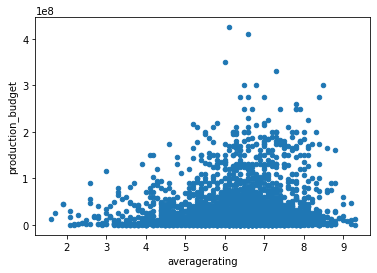

In [29]:
imdb_budget.plot('averagerating', 'production_budget', kind='scatter')

In [30]:
imdb_tmdb = pd.merge(imdb, tmdb_movies, on='original_title')
imdb_tmdb

,primary_title,original_title,start_year,genres,averagerating,numvotes,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
0,Inception,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066,4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186
1,The Dark Knight Rises,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769,5182,"[28, 80, 18, 53]",49026,en,26.220,2012-07-20,The Dark Knight Rises,7.7,13933
2,Interstellar,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334,11032,"[12, 18, 878]",157336,en,28.440,2014-11-05,Interstellar,8.2,18597
3,Django Unchained,Django Unchained,2012,"Drama,Western",8.4,1211405,5189,"[18, 37]",68718,en,21.260,2012-12-25,Django Unchained,8.0,15725
4,The Avengers,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655,5179,"[878, 28, 12]",24428,en,50.289,2012-05-04,The Avengers,7.6,19673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17886,The Black Hole,The Black Hole,2017,Comedy,4.2,5,15245,"[53, 878]",316784,en,2.075,2015-05-26,The Black Hole,2.9,14
17887,Girls on Film: The First Date,Girls on Film: The First Date,2014,"Comedy,Drama,Romance",6.8,5,13135,[],509818,en,0.629,2014-07-14,Girls on Film: The First Date,10.0,1
17888,A Mediocre Documentary with Tom And Dan,A Mediocre Documentary with Tom And Dan,2018,"Comedy,Documentary",9.8,5,25749,"[99, 35]",522817,en,1.551,2018-05-03,A Mediocre Documentary with Tom And Dan,10.0,1
17889,Henry Phillips: Neither Here Nor There,Henry Phillips: Neither Here Nor There,2018,Comedy,7.8,5,20287,[35],411515,en,0.600,2016-08-11,Henry Phillips: Neither Here Nor There,6.0,1


In [31]:
tmdb_budget = pd.merge(tmdb_movies, tn_movie_budgets_rename, left_on='original_title', right_on='primary_title')
tmdb_budget

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,primary_title,production_budget,domestic_gross,worldwide_gross
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,"Mar 26, 2010",How to Train Your Dragon,165000000,217581232,494870992
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,"May 7, 2010",Iron Man 2,170000000,312433331,621156389
2,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995",Toy Story,30000000,191796233,364545516
3,2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995",Toy Story,30000000,191796233,364545516
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,38,"Jul 16, 2010",Inception,160000000,292576195,835524642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,26323,[],509316,en,The Box,0.600,2018-03-04,The Box,8.0,1,66,"Nov 6, 2009",The Box,25000000,15051977,34356760
2312,26425,[10402],509306,en,The Box,0.600,2018-03-04,The Box,6.0,1,66,"Nov 6, 2009",The Box,25000000,15051977,34356760
2313,26092,"[35, 16]",546674,en,Enough,0.719,2018-03-22,Enough,8.7,3,68,"May 24, 2002",Enough,38000000,39177215,50970660
2314,26322,[],513161,en,Undiscovered,0.600,2018-04-07,Undiscovered,8.0,1,7,"Aug 26, 2005",Undiscovered,9000000,1069318,1069318


In [32]:
tmdb_budget.sort_values(by='production_budget')

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,primary_title,production_budget,domestic_gross,worldwide_gross
574,3468,"[35, 10749]",72766,en,Newlyweds,1.973,2011-12-26,Newlyweds,5.4,7,73,"Jan 13, 2012",Newlyweds,9000,4584,4584
1092,8893,"[878, 53]",86304,en,All Superheroes Must Die,2.078,2013-01-04,All Superheroes Must Die,3.9,19,56,"Jan 4, 2013",All Superheroes Must Die,20000,0,0
1163,10470,"[35, 10749]",255266,en,Dry Spell,0.600,2013-02-14,Dry Spell,6.0,1,54,"Dec 31, 2014",Dry Spell,22000,0,0
1411,12326,"[12, 27, 9648, 53]",279516,en,Ten,1.575,2014-03-28,Ten,5.4,5,51,"Apr 21, 2015",Ten,25000,0,0
1665,14678,"[53, 27]",226458,en,Exeter,5.934,2015-03-26,Exeter,4.7,121,49,"Sep 1, 2015",Exeter,25000,0,489792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007,23830,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209
2006,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209
1461,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
310,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875


<AxesSubplot:xlabel='vote_average', ylabel='production_budget'>

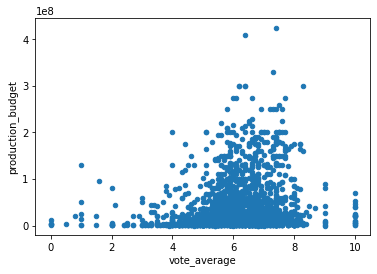

In [33]:
tmdb_budget.plot('vote_average', 'production_budget', kind='scatter')

In [34]:
imdb_tmdb_budget = pd.merge(imdb_budget, tmdb_movies, on='original_title')
imdb_tmdb_budget

,primary_title,original_title,start_year,genres,averagerating,numvotes,id_x,release_date_x,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,popularity,release_date_y,title,vote_average,vote_count
0,Inception,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066,38,"Jul 16, 2010",160000000,292576195,835524642,4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186
1,The Dark Knight Rises,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769,11,"Jul 20, 2012",275000000,448139099,1084439099,5182,"[28, 80, 18, 53]",49026,en,26.220,2012-07-20,The Dark Knight Rises,7.7,13933
2,Interstellar,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334,32,"Nov 5, 2014",165000000,188017894,666379375,11032,"[12, 18, 878]",157336,en,28.440,2014-11-05,Interstellar,8.2,18597
3,Django Unchained,Django Unchained,2012,"Drama,Western",8.4,1211405,69,"Dec 25, 2012",100000000,162805434,449948323,5189,"[18, 37]",68718,en,21.260,2012-12-25,Django Unchained,8.0,15725
4,The Avengers,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655,27,"May 4, 2012",225000000,623279547,1517935897,5179,"[878, 28, 12]",24428,en,50.289,2012-05-04,The Avengers,7.6,19673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,Triangle,Triangle,2012,Drama,6.9,10,52,"Feb 10, 2010",12000000,0,1594955,257,[27],26466,en,7.761,2010-02-02,Triangle,6.8,1094
2895,The Collector,The Collector,2012,"Action,Comedy",7.1,7,1,"Jul 31, 2009",3000000,7712114,10473836,6369,"[18, 10749]",85440,en,1.400,2012-06-07,The Collector,0.5,2
2896,La chambre bleue,La chambre bleue,2015,Documentary,6.2,6,23,"Oct 3, 2014",1400000,260441,1945420,11741,"[18, 80, 53]",266034,fr,3.824,2014-10-03,The Blue Room,6.6,52
2897,Big,Big,2017,Documentary,8.5,6,67,"Jun 3, 1988",18000000,114968774,151668774,7927,"[14, 18, 35, 10749, 10751]",2280,en,15.031,1988-06-03,Big,7.0,1813


In [35]:
movies = imdb_tmdb_budget.drop(columns=['original_title', 'id_x', 'Unnamed: 0',  'genre_ids', 'id_y', 'original_language', 'title'])

In [36]:
movies = movies.drop_duplicates(subset='primary_title')

In [37]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1750 entries, 0 to 2897
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      1750 non-null   object 
 1   start_year         1750 non-null   int64  
 2   genres             1750 non-null   object 
 3   averagerating      1750 non-null   float64
 4   numvotes           1750 non-null   int64  
 5   release_date_x     1750 non-null   object 
 6   production_budget  1750 non-null   int64  
 7   domestic_gross     1750 non-null   int64  
 8   worldwide_gross    1750 non-null   int64  
 9   popularity         1750 non-null   float64
 10  release_date_y     1750 non-null   object 
 11  vote_average       1750 non-null   float64
 12  vote_count         1750 non-null   int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 191.4+ KB


In [38]:
movies.head()

,primary_title,start_year,genres,averagerating,numvotes,release_date_x,production_budget,domestic_gross,worldwide_gross,popularity,release_date_y,vote_average,vote_count
0,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066,"Jul 16, 2010",160000000,292576195,835524642,27.920,2010-07-16,8.3,22186
1,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769,"Jul 20, 2012",275000000,448139099,1084439099,26.220,2012-07-20,7.7,13933
2,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334,"Nov 5, 2014",165000000,188017894,666379375,28.440,2014-11-05,8.2,18597
3,Django Unchained,2012,"Drama,Western",8.4,1211405,"Dec 25, 2012",100000000,162805434,449948323,21.260,2012-12-25,8.0,15725
4,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655,"May 4, 2012",225000000,623279547,1517935897,50.289,2012-05-04,7.6,19673


In [39]:
#new columns with release year, month and day
movies['release_year'] = movies['release_date_y'].str[:4]
movies['release_month'] = movies['release_date_y'].str[5:7]
movies['release_day'] = movies['release_date_y'].str[-2:]

In [40]:
movies['release_date'] = pd.to_datetime(movies['release_date_y'])

In [41]:
movies['release_y_m'] = movies['release_date'].dt.to_period('M')

In [42]:
movies['profit'] = movies['worldwide_gross'] - movies['production_budget']

In [43]:
movies['release_year'].value_counts()

2011    237
2014    229
2015    217
2013    216
2010    208
2012    199
2016    178
2017    139
2018    117
2019      3
1988      2
2000      1
1976      1
1986      1
2008      1
1995      1
Name: release_year, dtype: int64

In [44]:
movies_df = movies.loc[movies['release_year'] >= '2010']

In [103]:
movies_df.sort_values('primary_title')

,primary_title,start_year,genres,averagerating,numvotes,release_date_x,production_budget,domestic_gross,worldwide_gross,popularity,...,vote_average,vote_count,release_year,release_month,release_day,release_date,release_y_m,profit,genres_list,populartype
2405,#Horror,2015,"Crime,Drama,Horror",3.0,3092,"Nov 20, 2015",1500000,0,0,6.099,...,3.3,102,2015,11,20,2015-11-20,2015-11,-1500000,"[Crime, Drama, Horror]",low
293,10 Cloverfield Lane,2016,"Drama,Horror,Mystery",7.2,260383,"Mar 11, 2016",5000000,72082999,108286422,17.892,...,6.9,4629,2016,03,11,2016-03-11,2016-03,103286422,"[Drama, Horror, Mystery]",Medium
2565,10 Days in a Madhouse,2015,Drama,6.7,1114,"Nov 11, 2015",12000000,14616,14616,0.955,...,5.4,7,2015,11,20,2015-11-20,2015-11,-11985384,[Drama],low
1420,12 Strong,2018,"Action,Drama,History",6.6,50155,"Jan 19, 2018",35000000,45819713,71118378,13.183,...,5.6,1312,2018,01,19,2018-01-19,2018-01,36118378,"[Action, Drama, History]",Medium
39,12 Years a Slave,2013,"Biography,Drama,History",8.1,577301,"Oct 18, 2013",20000000,56671993,181025343,16.493,...,7.9,6631,2013,10,30,2013-10-30,2013-10,161025343,"[Biography, Drama, History]",Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,Zookeeper,2011,"Comedy,Family,Romance",5.2,52396,"Jul 8, 2011",80000000,80360866,170805525,10.764,...,5.3,886,2011,07,08,2011-07-08,2011-07,90805525,"[Comedy, Family, Romance]",Medium
1336,Zoolander 2,2016,Comedy,4.7,59914,"Feb 12, 2016",50000000,28848693,55348693,12.997,...,4.7,1374,2016,02,12,2016-02-12,2016-02,5348693,[Comedy],Medium
2456,Zoom,2015,"Animation,Comedy,Drama",6.1,2323,"Aug 11, 2006",35000000,11989328,12506188,3.434,...,5.5,43,2016,09,02,2016-09-02,2016-09,-22493812,"[Animation, Comedy, Drama]",low
150,Zootopia,2016,"Adventure,Animation,Comedy",8.0,383446,"Mar 4, 2016",150000000,341268248,1019429616,27.549,...,7.7,9977,2016,03,04,2016-03-04,2016-03,869429616,"[Adventure, Animation, Comedy]",Medium


In [45]:
movies_df.head()

,primary_title,start_year,genres,averagerating,numvotes,release_date_x,production_budget,domestic_gross,worldwide_gross,popularity,release_date_y,vote_average,vote_count,release_year,release_month,release_day,release_date,release_y_m,profit
0,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066,"Jul 16, 2010",160000000,292576195,835524642,27.920,2010-07-16,8.3,22186,2010,07,16,2010-07-16,2010-07,675524642
1,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769,"Jul 20, 2012",275000000,448139099,1084439099,26.220,2012-07-20,7.7,13933,2012,07,20,2012-07-20,2012-07,809439099
2,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334,"Nov 5, 2014",165000000,188017894,666379375,28.440,2014-11-05,8.2,18597,2014,11,05,2014-11-05,2014-11,501379375
3,Django Unchained,2012,"Drama,Western",8.4,1211405,"Dec 25, 2012",100000000,162805434,449948323,21.260,2012-12-25,8.0,15725,2012,12,25,2012-12-25,2012-12,349948323
4,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655,"May 4, 2012",225000000,623279547,1517935897,50.289,2012-05-04,7.6,19673,2012,05,04,2012-05-04,2012-05,1292935897


<AxesSubplot:>

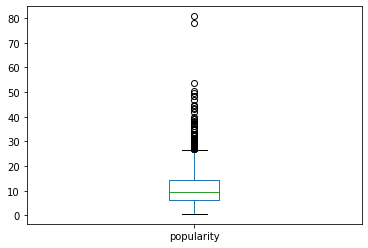

In [101]:
movies_df['popularity'].plot(kind='box')

In [46]:
movies_df['release_year'].value_counts()

2011    237
2014    229
2015    217
2013    216
2010    208
2012    199
2016    178
2017    139
2018    117
2019      3
Name: release_year, dtype: int64

In [49]:
movies_df['release_y_m'].value_counts()

2014-10    31
2011-10    29
2011-09    27
2015-10    27
2010-10    27
           ..
2017-03     8
2018-05     6
2019-02     1
2019-01     1
2019-05     1
Freq: M, Name: release_y_m, Length: 111, dtype: int64

In [47]:
movies_df.describe()

,start_year,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,popularity,vote_average,vote_count,profit
count,1743.000000,1743.000000,1.743000e+03,1.743000e+03,1.743000e+03,1.743000e+03,1743.000000,1743.000000,1743.000000,1.743000e+03
mean,2013.658061,6.250316,1.016609e+05,3.908693e+07,4.808888e+07,1.191166e+08,10.934148,6.160528,1682.991968,8.002966e+07
std,2.449982,1.070585,1.553341e+05,5.211415e+07,7.818845e+07,2.140905e+08,8.022026,1.071005,2630.435824,1.753233e+08
min,2010.000000,1.600000,5.000000e+00,9.000000e+03,0.000000e+00,0.000000e+00,0.600000,0.000000,1.000000,-1.104502e+08
25%,2012.000000,5.700000,8.551000e+03,5.000000e+06,1.044091e+06,3.299828e+06,6.225000,5.600000,93.500000,-1.648424e+06
50%,2014.000000,6.400000,4.543900e+04,2.000000e+07,2.039683e+07,3.696466e+07,9.587000,6.200000,667.000000,1.374940e+07
75%,2016.000000,7.000000,1.221060e+05,5.000000e+07,5.824382e+07,1.268180e+08,14.425500,6.800000,2079.500000,7.831078e+07
max,2019.000000,9.300000,1.841066e+06,4.106000e+08,7.000596e+08,2.048134e+09,80.773000,10.000000,22186.000000,1.748134e+09


Release month affects popularity
Find the good time to release movie

In [50]:
movies_df[['popularity','release_y_m']].groupby(['release_y_m']).agg(['median'])

,popularity
,median
release_y_m,
2010-01,6.1225
2010-02,9.6780
2010-03,9.5490
2010-04,6.7490
2010-05,7.6660
...,...
2018-11,26.5710
2018-12,22.0320


In [51]:
release_date_popular = movies_df[['popularity','release_y_m']].groupby(['release_y_m']).agg(['median'])

<AxesSubplot:xlabel='release_y_m'>

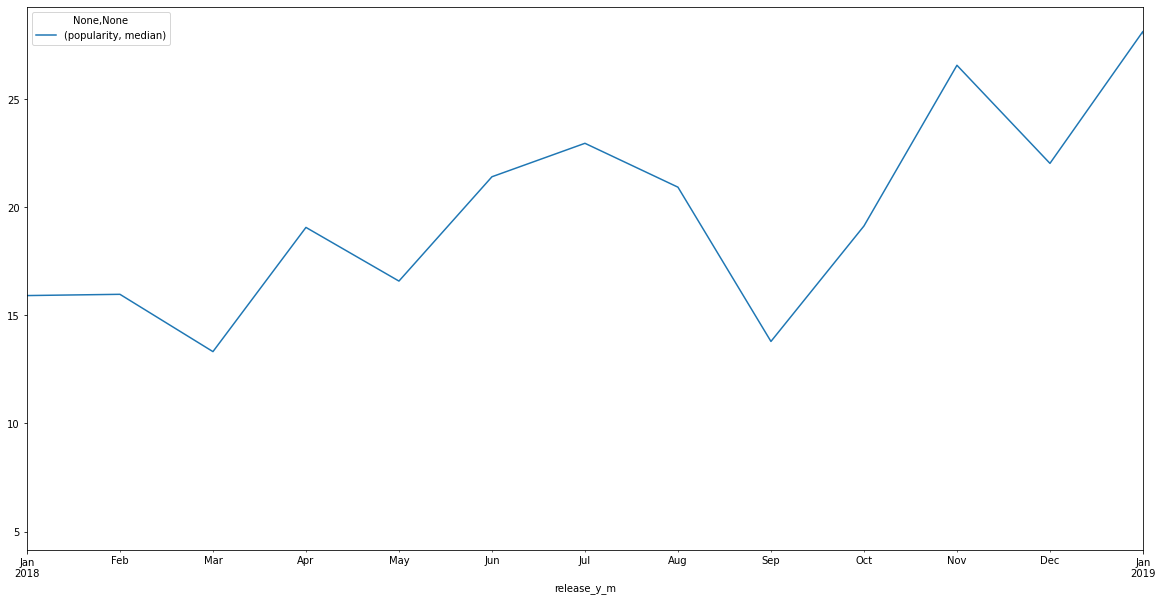

In [79]:
release_date_popular.plot(kind = 'line', figsize = (20, 10), xlim = ('2018', '2019'))

In [53]:
release_month_profit = movies_df[['profit', 'release_month']].groupby(['release_month']).agg(['median'])

<AxesSubplot:xlabel='release_month'>

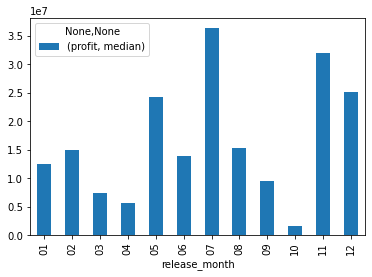

In [102]:
release_month_profit.plot(kind = 'bar')

find what genre is most popular

In [55]:
movies_df.explode('genres')

,primary_title,start_year,genres,averagerating,numvotes,release_date_x,production_budget,domestic_gross,worldwide_gross,popularity,release_date_y,vote_average,vote_count,release_year,release_month,release_day,release_date,release_y_m,profit
0,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066,"Jul 16, 2010",160000000,292576195,835524642,27.920,2010-07-16,8.3,22186,2010,07,16,2010-07-16,2010-07,675524642
1,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769,"Jul 20, 2012",275000000,448139099,1084439099,26.220,2012-07-20,7.7,13933,2012,07,20,2012-07-20,2012-07,809439099
2,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334,"Nov 5, 2014",165000000,188017894,666379375,28.440,2014-11-05,8.2,18597,2014,11,05,2014-11-05,2014-11,501379375
3,Django Unchained,2012,"Drama,Western",8.4,1211405,"Dec 25, 2012",100000000,162805434,449948323,21.260,2012-12-25,8.0,15725,2012,12,25,2012-12-25,2012-12,349948323
4,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655,"May 4, 2012",225000000,623279547,1517935897,50.289,2012-05-04,7.6,19673,2012,05,04,2012-05-04,2012-05,1292935897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2892,Emily,2017,Drama,6.8,13,"Jan 27, 2017",27000,3547,3547,0.600,2013-06-21,7.0,1,2013,06,21,2013-06-21,2013-06,-23453
2893,War of the Worlds,2013,Sci-Fi,5.8,11,"Jun 29, 2005",132000000,234280354,606836535,0.600,2013-10-29,7.1,5,2013,10,29,2013-10-29,2013-10,474836535
2894,Triangle,2012,Drama,6.9,10,"Feb 10, 2010",12000000,0,1594955,7.761,2010-02-02,6.8,1094,2010,02,02,2010-02-02,2010-02,-10405045
2895,The Collector,2012,"Action,Comedy",7.1,7,"Jul 31, 2009",3000000,7712114,10473836,1.400,2012-06-07,0.5,2,2012,06,07,2012-06-07,2012-06,7473836


In [56]:
movies_df['genres_list'] = movies_df['genres'].apply(lambda x: x.split(','))

<ipython-input-56-4fe653897e4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['genres_list'] = movies_df['genres'].apply(lambda x: x.split(','))


In [57]:
movies_df.head()

,primary_title,start_year,genres,averagerating,numvotes,release_date_x,production_budget,domestic_gross,worldwide_gross,popularity,release_date_y,vote_average,vote_count,release_year,release_month,release_day,release_date,release_y_m,profit,genres_list
0,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066,"Jul 16, 2010",160000000,292576195,835524642,27.920,2010-07-16,8.3,22186,2010,07,16,2010-07-16,2010-07,675524642,"[Action, Adventure, Sci-Fi]"
1,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769,"Jul 20, 2012",275000000,448139099,1084439099,26.220,2012-07-20,7.7,13933,2012,07,20,2012-07-20,2012-07,809439099,"[Action, Thriller]"
2,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334,"Nov 5, 2014",165000000,188017894,666379375,28.440,2014-11-05,8.2,18597,2014,11,05,2014-11-05,2014-11,501379375,"[Adventure, Drama, Sci-Fi]"
3,Django Unchained,2012,"Drama,Western",8.4,1211405,"Dec 25, 2012",100000000,162805434,449948323,21.260,2012-12-25,8.0,15725,2012,12,25,2012-12-25,2012-12,349948323,"[Drama, Western]"
4,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655,"May 4, 2012",225000000,623279547,1517935897,50.289,2012-05-04,7.6,19673,2012,05,04,2012-05-04,2012-05,1292935897,"[Action, Adventure, Sci-Fi]"


In [58]:
movie_genres = movies_df.explode('genres_list')

In [59]:
movie_genres['genres_list'].value_counts()

Drama          885
Comedy         570
Action         470
Adventure      361
Thriller       320
Crime          275
Horror         237
Romance        221
Biography      156
Sci-Fi         156
Mystery        149
Fantasy        127
Animation      105
Family         100
Documentary     58
History         52
Music           50
Sport           40
War             23
Western         14
Musical         10
Name: genres_list, dtype: int64

In [60]:
genres_popularity = movie_genres[['popularity', 'genres_list']].groupby('genres_list').agg('median').sort_values(by= 'popularity')

<AxesSubplot:ylabel='genres_list'>

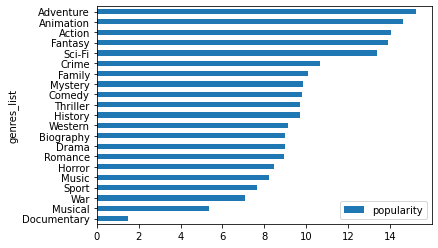

In [61]:
genres_popularity.plot(kind = 'barh')

In [62]:
genres_profit = movie_genres[['profit', 'genres_list']].groupby('genres_list').agg('median').sort_values(by='profit')

<AxesSubplot:ylabel='genres_list'>

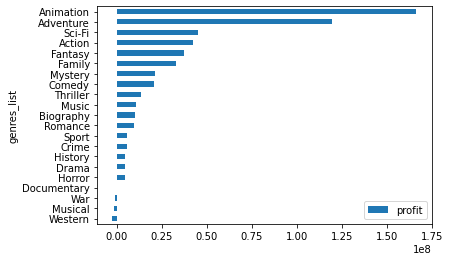

In [63]:
genres_profit.plot(kind='barh')

<AxesSubplot:xlabel='production_budget', ylabel='popularity'>

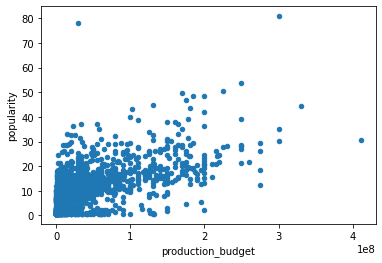

In [64]:
movies_df.plot('production_budget', 'popularity', kind = 'scatter' )

In [65]:
def popularity_type(popularity):
    '''
    This function takes in the number of populartiy and returns a descriptive string. 
    This is used to categorize popularity for further analysis.
    
    Less than 10: 'low'
    10 to 40: 'Medium'
    More than 40: 'high'
    '''
    if (popularity < 10):
        return 'low'
    elif (popularity > 40):
        return 'high'
    else:
        return 'Medium'

In [66]:
movies_df['populartype'] = movies_df['popularity'].apply(popularity_type)

<ipython-input-66-96eddb60040b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['populartype'] = movies_df['popularity'].apply(popularity_type)


In [67]:
budget_popularity = movies_df[['populartype', 'production_budget']].groupby('populartype').agg('median')

In [68]:
budget_popularity

,production_budget
populartype,
Medium,40000000
high,182500000
low,8500000


<AxesSubplot:xlabel='populartype'>

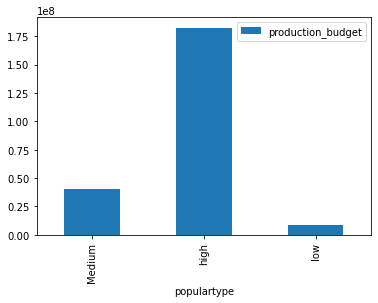

In [69]:
budget_popularity.plot(kind='bar')

At the end, it is always a best practice to close the connection to the database.

In [ ]:
conn.close()